In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)


In [24]:
pom=[] #pomocna premenna
class Perceptron():   #nazov triedy
    def __init__(self, rychlost_ucenia=0.01, pocet_iteracii=10):   #konstruktor - rychlost ucenia = koeficient rychlosti ucenia sa
        self.eta = rychlost_ucenia 
        self.n_iter = pocet_iteracii      #definuje sa rychlost ucnia a pocet iteraci
    
    def fit(self, X,y):                 #inicializacia vahoveho vektora, vahy = matica  obsahujuca 1 riadok
        self.vahy = np.zeros(1+ X.shape[1])   
        self.errors_=[]  #premenna, kt. neskor v grave vyjadr. chybu 
        
        for i in range(self.n_iter):   #cyklus s poctom opaovani=pocet iteraci, 
            errors = 0   #premenna, citanie chyby 
            for matica,vystup in zip(X,y):  #Zoskupí sa X a y - nový iterovateľný objekt  
                update = self.eta * (vystup-self.predikcia(matica))
                self.vahy[1:] += update*matica  #pravidlá pre učenie sa
                self.vahy[0]+= update # učenie sa bez násobenia s maticou, dostaneme 'errors'
                errors += int(update !=0.0)   #ak update je ina hodnota ako 0.0, pripočitanie do erroru
            self.errors_.append(errors)     #k errors sa postupne pripaja error 
            print ("Error:")
            print(errors) #postupne vypisuje error, vidiet ako postupne klesa
            pom.append(errors) #do pomocnej premennej - pola sa pripoji hodnota erroru - koli vykresleniu v grafe
       
        return self  

    def net_input(self, X):  
        return np.dot(X, self.vahy[1:])+ self.vahy[0] #metoda vracajuca vynasob. vstup X s váhou (self.vahy[1:]), k tej je pripocitana vaha (self.vahy[0])

    def predikcia(self, X):  #metóda predpovedania, f (x) = 1, ak w.x + b> 0: 0 inak algoritmus, vstupy očakávajú, že ide o pole s čiarami / vektorom dimenzie rovnajúcej sa poctu vstupov
        return np.where(self.net_input(X) >= 0.0, 1, -1)   


Error:
2
Error:
2
Error:
3
Error:
2
Error:
1
Error:
0
Error:
0
Error:
0
Error:
0
Error:
0


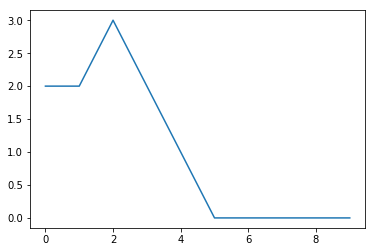

In [25]:
#do prvy a treti stlpec [0,2] sa natiahne 100 zaznamov
X = df.iloc[0:100,[0,2]].values
y = df.iloc[0:100,4].values

y = np.where(y=='Iris-setosa',-1,1)

ppn = Perceptron() 

err = ppn.fit(X,y)
plt.plot(pom)  #do premennej sa nacital error 
plt.show()    #zobrazenie grafu

In [26]:

print(X[:5])
print(y)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [27]:
print("Postupné chyby")
print(err.errors_[1:10])

print("Hodnoty váh")
print(err.vahy)

Postupné chyby
[2, 3, 2, 1, 0, 0, 0, 0, 0]
Hodnoty váh
[-0.04  -0.068  0.182]
